In [2]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
# Import the MaskFormer models from Hugging Face's Transformers library
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation

# Load pre-trained MaskFormer feature extractor and instance segmentation model
feature_extractor = MaskFormerFeatureExtractor.from_pretrained("facebook/maskformer-swin-base-coco")
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-coco")

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\maskformer\feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:410: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:417: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


In [19]:
# Uncomment this section to load Mask2Former model for COCO panoptic segmentation
"""
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

# Load an image processor for Mask2Former
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")

# Load the Mask2Former model fine-tuned on COCO panoptic segmentation
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")
"""

In [ ]:
# Uncomment this section to load an alternative Mask2Former model for COCO panoptic segmentation
"""
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

# Load an image processor for Mask2Former
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-coco-panoptic")

# Load the alternative Mask2Former model fine-tuned on COCO panoptic segmentation
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-coco-panoptic")
"""

In [4]:
# Load an image from a file
image = Image.open(r"C:\Users\HP\Desktop\IMG segmentation\test images\test1.jpg")

In [5]:
# Extract features from the image using the feature extractor
inputs = feature_extractor(images=image, return_tensors="pt")

In [6]:
# Disable gradient calculation since we're only doing inference
with torch.no_grad():
    # Pass the extracted features through the MaskFormer model
    outputs = model(**inputs)

In [15]:
# Post-process the segmentation results to obtain the predicted panoptic map
result = feature_extractor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

`label_ids_to_fuse` unset. No instance will be fused.


In [23]:
predicted_panoptic_map = result["segmentation"]

In [24]:
# Create a colormap (you can use any colormap you prefer)
cmap = plt.get_cmap("tab20b")

# Normalize the segmentation map to range between 0 and 1
norm = plt.Normalize(predicted_panoptic_map.min(), predicted_panoptic_map.max())

# Map the normalized segmentation map to RGB colors
segmented_image = cmap(norm(predicted_panoptic_map))

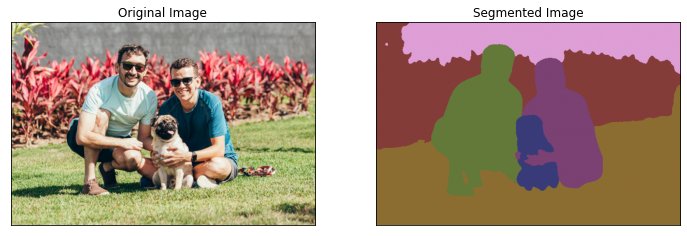

In [25]:
# Create a subplot for displaying the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image on the left
ax[0].imshow(image)
ax[0].set_title("Original Image")

# Plot the segmented image on the right
ax[1].imshow(segmented_image)
ax[1].set_title("Segmented Image")

# Remove x and y ticks from both subplots
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

# Show the figure with both images
plt.show()